Here's a quick step-by-step demonstration on how to perform a RFM analysis that is a technique often using in marketing for customer segmentation. 

In [1]:
# import python packages needed for this project
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# read file
sales_data = pd.read_csv('/kaggle/input/sales-data-csv/sales_data.csv')

After reading the file, start with checking the dataset and perform any data cleaning or manipulating procedure where needed. 

In [3]:
# check datatypes 
sales_data.dtypes

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
dtype: object

In [4]:
# notice that the IDs are integers, and Date fields are objects
# convert ID fields to string(object) and Date fields to datetime
data_type = {
    '_SalesTeamID':str,
    '_CustomerID':str,
    '_StoreID':str,
    '_ProductID':str
}

sales_data = pd.read_csv('/kaggle/input/sales-data-csv/sales_data.csv', 
                         dtype=data_type, 
                         parse_dates=['ProcuredDate','OrderDate','ShipDate','DeliveryDate'])
sales_data.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                object
_CustomerID                 object
_StoreID                    object
_ProductID                  object
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
dtype: object

In [5]:
# copy dataset to use in analysis to prevent altering the original file
df = sales_data.copy()
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,339,29,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,202,3,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,241,35,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,112,36,8,0.100,1072.0,804.000


In [6]:
# revenue data missing
# calculate revenue for each transaction
df['Revenue'] = (df['Unit Price'] - (df['Unit Price'] * df['Discount Applied']) - df['Unit Cost']) * df['Order Quantity']
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,4073.4325
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,886.4100
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,905.5050
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,5486.7640
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,1312.1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,339,29,1,0.075,234.5,121.940,94.9725
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,202,3,6,0.050,3202.6,1921.560,6725.4600
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,241,35,5,0.200,3825.7,2792.761,1338.9950
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,112,36,8,0.100,1072.0,804.000,1286.4000


In [7]:
# select only the columns needed for the analysis
# this helps to simplify the dataset and to read better
columns = ['OrderNumber', '_CustomerID','OrderDate','Revenue']
df_dataset = df[columns]

df_dataset.sort_values(by='OrderDate',ascending=False)

,OrderNumber,_CustomerID,OrderDate,Revenue
7990,SO - 0008091,41,2020-12-30,3371.7750
7989,SO - 0008090,42,2020-12-30,1286.4000
7988,SO - 0008089,32,2020-12-30,1338.9950
7987,SO - 0008088,29,2020-12-30,6725.4600
7986,SO - 0008087,41,2020-12-30,94.9725
...,...,...,...,...
1,SO - 000102,20,2018-05-31,886.4100
5,SO - 000106,21,2018-05-31,2700.1000
6,SO - 000107,14,2018-05-31,1908.1600
7,SO - 000108,9,2018-05-31,998.6350


After all the cleaning and organizing, the dataset is ready to be used for the RFM analysis. But before we start performing the calculation, since the dates of the dataset is fairly old (the most recent year is 2020), it is better not to use today's date but rather setting a date that is relatively closer to the most recent date with the dataset to provide more accurate insights about this dataset. Thus, we'll start with defining "today's date" to '2021-01-01' and work from there.  

In [8]:
# manually set the current date
today_date = pd.to_datetime('2021-01-01')

# calculate customer's recency, frequency, and monetary
rfm = df_dataset.groupby('_CustomerID').agg(
    Recency=('OrderDate', lambda v: (today_date - v.max()).days),
    Frequency=('OrderNumber', 'count'),
    Monetary=('Revenue', 'sum')
)

rfm.head(20)

,Recency,Frequency,Monetary
_CustomerID,,,
1,9,152,335933.6115
10,15,158,435122.1870
11,6,178,487614.2415
12,3,210,616719.2550
13,4,171,441003.2795
14,5,157,381450.0280
15,4,142,441668.3550
16,3,135,402938.7705
17,6,175,534027.3860


In [9]:
# assign scores based on quantiles using 5 bins
r = pd.qcut(rfm['Recency'], q=5, labels=range(5,0,-1)) #score 1-5, more days gets lower score
f = pd.qcut(rfm['Frequency'], q=5, labels=range(1,6)) #score 1-5, the higher count gets higher score
m = pd.qcut(rfm['Monetary'], q=5, labels=range(1,6)) #score 1-5, the higher revenue gets higher score

rfm = rfm.assign(R_Score = r.values,
           F_Score = f.values,
           M_Score = m.values)

rfm['R-F-M'] = rfm[['R_Score','F_Score','M_Score']].apply(lambda v:'-'.join(v.astype(str)), axis=1)
rfm['RFM_score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

rfm.sort_values(by='RFM_score', ascending=False).head(20)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,R-F-M,RFM_score
_CustomerID,,,,,,,,
12,3,210,616719.2550,5,5,5,5-5-5,15
29,2,179,531770.6920,5,5,5,5-5-5,15
21,3,164,479383.0905,5,4,5,5-4-5,14
32,2,173,435206.0710,5,5,3,5-5-3,13
11,6,178,487614.2415,3,5,5,3-5-5,13
39,4,176,471608.1425,4,5,4,4-5-4,13
17,6,175,534027.3860,3,5,5,3-5-5,13
19,3,165,443231.8335,5,4,4,5-4-4,13
4,5,167,526981.0630,3,4,5,3-4-5,12


In [10]:
# check the statistic for each score
rfm.describe()

,Recency,Frequency,Monetary,RFM_score
count,50.000000,50.00000,50.000000,50.000000
mean,7.100000,159.82000,426506.543100,9.000000
std,5.395576,14.23088,61829.500149,3.103652
min,2.000000,135.00000,327409.134500,4.000000
25%,4.000000,151.25000,379173.552250,7.000000
50%,5.000000,157.50000,431140.896250,9.000000
75%,9.000000,167.75000,459110.934000,11.000000
max,30.000000,210.00000,616719.255000,15.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

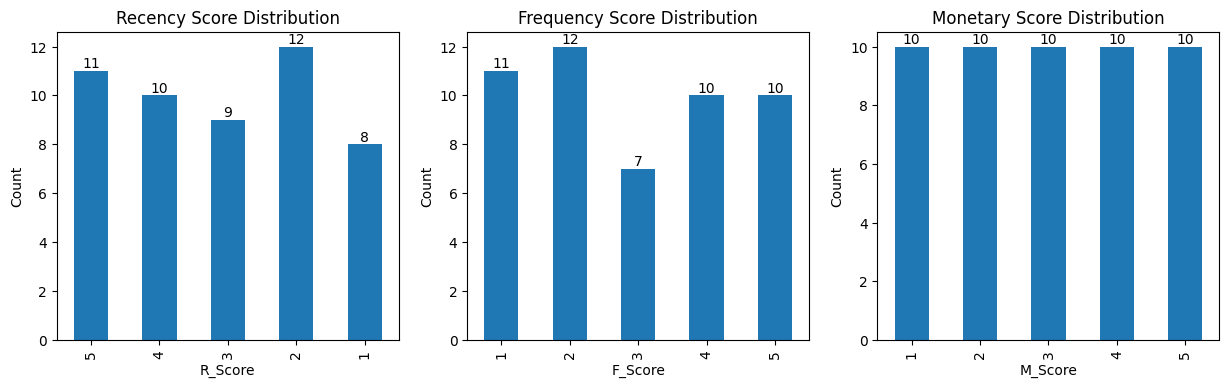

In [12]:
# create distribution plot for Recency, Frequency, and Monetary Scores
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot the Recency Score distribution
recency_counts = rfm['R_Score'].value_counts().sort_index()
recency_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('R_Score')
axes[0].set_ylabel('Count')

# Add the number of counts on each bar
for i, count in enumerate(recency_counts):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

# Plot the Frequency Score distribution
frequency_counts = rfm['F_Score'].value_counts().sort_index()
frequency_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('F_Score')
axes[1].set_ylabel('Count')

for i, count in enumerate(frequency_counts):
    axes[1].text(i, count, str(count), ha='center', va='bottom')

# Plot the Monetary Score distribution
monetary_counts = rfm['M_Score'].value_counts().sort_index()
monetary_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('M_Score')
axes[2].set_ylabel('Count')

for i, count in enumerate(monetary_counts):
    axes[2].text(i, count, str(count), ha='center', va='bottom')



plt.show()

Next, define and segment customers based on the combination of R-F-M code. 

* Champions: Customers with high scores (4 or 5) in Recency, Frequency, and Monetary.
* Loyal Customers: Customers with moderate to high scores (3 or higher) in Recency, Frequency, and Monetary.
* Potential Loyalists: Customers with moderate scores (3 or higher in Recency, and at least 2 in Frequency and Monetary).
* Needs Attention: Customers with low to moderate scores (2 or higher in Recency, Frequency, and Monetary).
* At Risk: Customers with low scores (1 or higher in Recency, Frequency, and Monetary).
* Hibernating: Customers who do not fit into the above segments, indicating very low engagement and spending.

In [13]:
# segment customers based on R-F-M combination
# first, ensure scores are integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Define the segmentation function
def rfm_segment(df):
    if df['R_Score'] >= 4 and df['F_Score'] >= 4 and df['M_Score'] >= 4:
        return 'Champions'
    elif df['R_Score'] >= 3 and df['F_Score'] >= 3 and df['M_Score'] >= 3:
        return 'Loyal Customers'
    elif df['R_Score'] >= 3 and df['F_Score'] >= 2 and df['M_Score'] >= 2:
        return 'Potential Loyalists'
    elif df['R_Score'] >= 2 and df['F_Score'] >= 2 and df['M_Score'] >= 2:
        return 'Needs Attention'
    elif df['R_Score'] >= 1 and df['F_Score'] >= 1 and df['M_Score'] >= 1:
        return 'At Risk'
    else:
        return 'Hibernating'
    
# Apply the segmentation function to the dataframe
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

rfm.head(20)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,R-F-M,RFM_score,Segment
_CustomerID,,,,,,,,,
1,9,152,335933.6115,2,2,1,2-2-1,5,At Risk
10,15,158,435122.1870,1,3,3,1-3-3,7,At Risk
11,6,178,487614.2415,3,5,5,3-5-5,13,Loyal Customers
12,3,210,616719.2550,5,5,5,5-5-5,15,Champions
13,4,171,441003.2795,4,4,3,4-4-3,11,Loyal Customers
14,5,157,381450.0280,3,3,2,3-3-2,8,Potential Loyalists
15,4,142,441668.3550,4,1,4,4-1-4,9,At Risk
16,3,135,402938.7705,5,1,2,5-1-2,8,At Risk
17,6,175,534027.3860,3,5,5,3-5-5,13,Loyal Customers


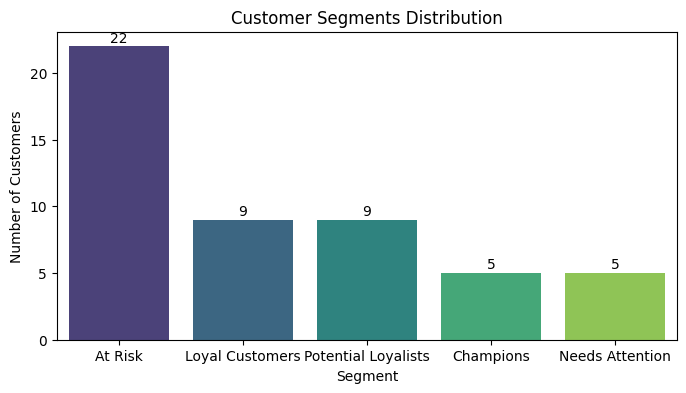

In [14]:
# use barplot to visualize the distribution of segments
plt.figure(figsize=(8, 4))
segment_counts = rfm['Segment'].value_counts().reset_index(name='Count')

# Create the barplot
sns.barplot(segment_counts, x='Segment', y='Count', palette='viridis')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')

for i in range(segment_counts.shape[0]):
    plt.text(i, segment_counts['Count'][i] + 0.1, str(segment_counts['Count'][i]), ha='center', va='bottom')

    
plt.show()

Or, use a treemap to display the distribution for each segment.

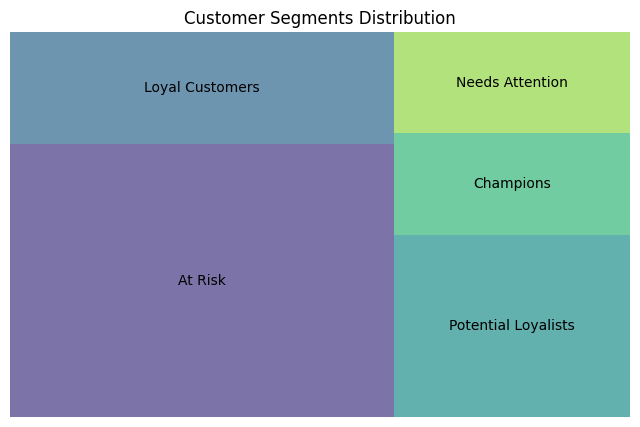

In [15]:
# use treemap to display each segment
import squarify 

plt.figure(figsize=(8, 5))
squarify.plot(sizes=segment_counts['Count'], 
              label=segment_counts['Segment'], 
              alpha=0.7, 
              color=sns.color_palette('viridis', n_colors=segment_counts.shape[0]))
plt.title('Customer Segments Distribution')
plt.axis('off')  # Hide the axes

plt.show()

From this treemap, it is evident that the "At Risk" segment has the largest block, suggesting that a significant portion of customers are at risk of churning. The second-largest block is the "Loyal Customers" segment, indicating a healthy base of regular customers. The "Champions" segment, with a comparably smaller block, suggests there are fewer top-tier/high-value customers.

To address and improve these issues, the following business strategies and actions can be taken:
1. **Focus on Retention:** The high number of "At Risk" customers indicates that the company should prioritize and focus more on customer retention. Investing in understanding customer satisfaction with both the service and products is crucial.
2. **Growth Potential:** Work on converting "Potential Loyalists" into "Loyal Customers" by nurturing them with targeted promotions such as limited-time exclusive promo codes, benefits of loyalty programs, and ensure excellent customer service.
3. **Reward Champions and Loyal Customers:** Continue rewarding these segments to keep them satisfied and maintain their loyalty. Provide exclusive deals, early access events, discounts, and loyalty programs. For example, Nordstrom offers early access with special discounts for VVIPs.
4. **Follow ups:** Try to understand why the "Needs Attention" segment is inactive and address potential issues. Follow up with personalized emails/messages or customer feedback surveys are good ways to re-engage these customers. 

##### Resources: 
* Dataset sourced from "RFM Analysis Tutorial in Python" by Jie Jenn (https://www.youtube.com/watch?v=9wxWrERZvss)
* What is RFM Score? (https://www.omniconvert.com/blog/rfm-score/#how-to-calculate-the-rfm-score)
* RFM Analysis using Python (https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/)

